In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
from sklearn.model_selection import LeaveOneOut, KFold , train_test_split 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Performing Analysis for FEV1 Data

In [2]:
# Loading npy data.
X = np.load("/VS dir/PlayingSpiroData/Spiro-Data/npy_file/FEV1_FEATURES_60.npy")
y = np.load("/VS dir/PlayingSpiroData/Spiro-Data/npy_file/FEV1_LABELS_60.npy")

# Removing erroreneous data

X= pd.DataFrame(X).drop(index=[23,55,4,9,52,44,45,33,43,20,1,50])
y= pd.DataFrame(y).drop(index=[23,55,4,9,52,44,45,33,43,20,1,50])

### Initializing Random Forest

In [8]:
# Instantiating Random forrest Regressor.
RF = RandomForestRegressor( n_jobs=-1, bootstrap=True, criterion='squared_error', 
                                  n_estimators=500,  max_features='sqrt', max_depth=300,  
                                  min_samples_leaf=1, min_samples_split=5 ,random_state=42)

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,shuffle=True,random_state=42)
# RF.fit(X_train,y_train)

RF.fit(X,np.ravel(y))
# y_hat = RF.predict(X_test)

# rmseerror =mean_squared_error(y_test,y_hat,squared=False)
# aberror = 100 * mean_absolute_percentage_error(y_test,y_hat) 
# meaerror = mean_absolute_error(y_test,y_hat)
    

# print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
# print("\tMetrics obtained")
# print("\tMean Absolute Percentage Error :",aberror)
# print("\tMean Absolute Error :", meaerror)
# print("\tRoot Mean Square Error :",rmseerror)
# print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")

RandomForestRegressor(max_depth=300, max_features='sqrt', min_samples_split=5,
                      n_estimators=500, n_jobs=-1, random_state=42)

### Identifying Feature importance from our Models.

In [9]:
RF_imp = pd.DataFrame(RF.feature_importances_)

# Storing Feature importance and the features.
RF_feature_importance = RF_imp.sort_values(by=0,ascending=False)
RF_feature = RF_feature_importance.index

# Cumulative feature importance.
Cumul_Imp = np.cumsum(RF_feature_importance[0])
Cumul90 = Cumul_Imp[Cumul_Imp<0.9]
print(Cumul90)

1      0.031384
21     0.050966
52     0.069185
4      0.083641
121    0.096714
         ...   
109    0.883136
16     0.886632
23     0.890091
42     0.893493
10     0.896881
Name: 0, Length: 126, dtype: float64


## Plotting Feature Data

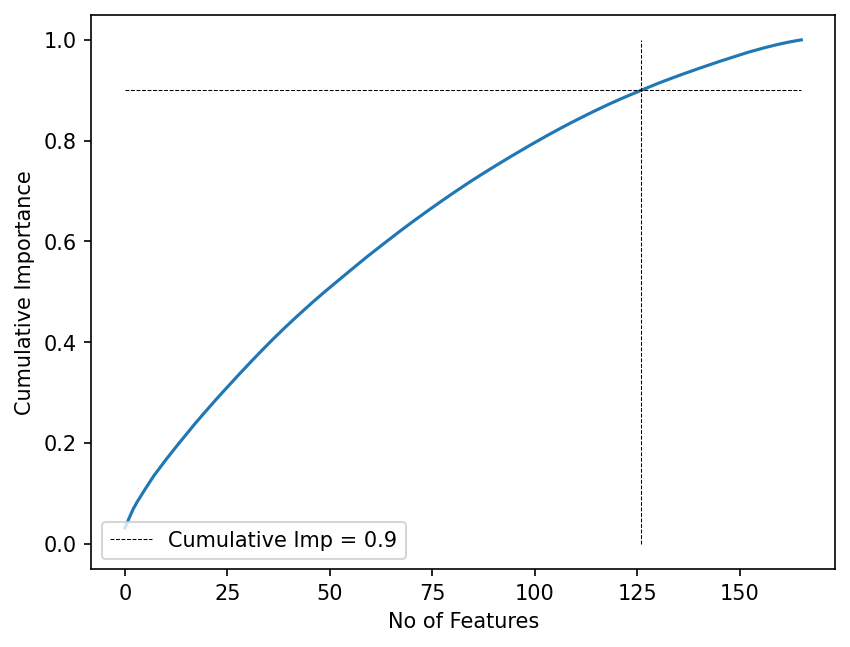

In [10]:
plt.figure(dpi=150)
f =[i for i in range(len(X.columns))]
plt.plot(f,Cumul_Imp)
plt.plot(f,[0.9]*len(f),color = 'black',linestyle='dashed',linewidth=0.5,label = "Cumulative Imp = 0.9")
plt.plot([len(Cumul90)]*len(np.linspace(0,1,10)),np.linspace(0,1,10),color = 'black',linestyle='dashed',linewidth=0.5)
plt.xlabel("No of Features")
plt.ylabel("Cumulative Importance")
plt.legend(loc= 'lower left')
plt.show()

# Retraining Random Forest using Leave one out Cross Validation.

In [12]:
# feature_index = Cumul90.index
# feature_index = [1, 164, 120, 34, 15, 84, 57, 104, 77, 66, 9, 41, 88, 21, 27]

X_new = X
y_new = y

RF_new = RandomForestRegressor( n_jobs=-1, bootstrap=True, criterion='squared_error', 
                                  n_estimators=500,  max_features='sqrt', max_depth=100,  
                                  min_samples_leaf=1, min_samples_split=5 ,random_state=42)

# Total number of the splits
tot = len(X_new)
# Instantiating Leave_One_Out split function.
loo = LeaveOneOut()

prog = 0
y_GT = []
y_PT = []
abserror=[]

print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
print("Random Forest Regressor for FEV1")

# For every split obtained by Leave_One_Out split function.
for i,(train_index, test_index) in enumerate(loo.split(X_new)):
    
    # To show some sort of progress.
    prog = prog + 1
    print("Progress : {0}/{1}".format(prog,tot),end = '\r')

    # Test-train split for the fold.
    X_Train, X_Test = X_new.iloc[train_index],X_new.iloc[test_index]
    y_Train, y_Test = y_new.iloc[train_index],y_new.iloc[test_index]
    
    # Training new Random Forest ensemble.
    RF_new.fit(X_Train, np.ravel(y_Train))
    pred = RF_new.predict(X_Test)  

    # Storing the values of Ground truth and Predicted value for future use.
    y_GT.append(y_Test.iloc[0,0])
    y_PT.append(pred[0]) 


print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Random forest metrics with reduced feature set")
print("\tMean Absolute Percentage Error : " , 100 * mean_absolute_percentage_error(y_GT,y_PT))
print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Random Forest Regressor for FEV1
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random forest metrics with reduced feature set
	Mean Absolute Percentage Error :  5.916390686337724
	Mean Aabsolute Error :  0.17631504863307967
	Mean Square Error :  0.05430735508700708
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


## Retraining Random forest using new features using Leave One Out Cross validation

In [11]:
feature_index = Cumul90.index
# feature_index = [1, 164, 120, 34, 15, 84, 57, 104, 77, 66, 9, 41, 88, 21, 27]

X_new = X.iloc[:,feature_index]
y_new = y

RF_new = RandomForestRegressor( n_jobs=-1, bootstrap=True, criterion='squared_error', 
                                  n_estimators=500,  max_features='sqrt', max_depth=100,  
                                  min_samples_leaf=1, min_samples_split=5 ,random_state=42)

# Total number of the splits
tot = len(X_new)
# Instantiating Leave_One_Out split function.
loo = LeaveOneOut()

prog = 0
y_GT = []
y_PT = []
abserror=[]

print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=")
print("Random Forest Regressor for FEV1")

# For every split obtained by Leave_One_Out split function.
for i,(train_index, test_index) in enumerate(loo.split(X_new)):
    
    # To show some sort of progress.
    prog = prog + 1
    print("Progress : {0}/{1}".format(prog,tot),end = '\r')

    # Test-train split for the fold.
    X_Train, X_Test = X_new.iloc[train_index],X_new.iloc[test_index]
    y_Train, y_Test = y_new.iloc[train_index],y_new.iloc[test_index]
    
    # Training new Random Forest ensemble.
    RF_new.fit(X_Train, np.ravel(y_Train))
    pred = RF_new.predict(X_Test)  

    # Storing the values of Ground truth and Predicted value for future use.
    y_GT.append(y_Test.iloc[0,0])
    y_PT.append(pred[0]) 


print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")
print("Random forest metrics with reduced feature set")
print("\tMean Absolute Percentage Error : " , 100 * mean_absolute_percentage_error(y_GT,y_PT))
print("\tMean Aabsolute Error : " , mean_absolute_error(y_GT,y_PT))
print("\tMean Square Error : " , mean_squared_error(y_GT,y_PT))
print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=")


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=
Random Forest Regressor for FEV1
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random forest metrics with reduced feature set
	Mean Absolute Percentage Error :  5.920648412054003
	Mean Aabsolute Error :  0.17643874937793683
	Mean Square Error :  0.05371402080952811
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
